# ARN - Practical Work 1
The file vowels.zip contains the sounds in WAV format. They have been collected by the team of Prof. Peter Assmann of the School of Behavioral and Brain Sciences of Texas University in Dallas. You will also find a set of synthetic sounds corresponding to each vowel and each speaker. 

Please read the file 0_README.txt inside the vowels folder for more information.

Typical features of speech are timbre, pitch, intonation and tempo. in this practical work we will use the Mel-Frequency Cepstrum Coefficients (MFCC) which have been found to be very useful for speech recognition. In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency. You can compute the MFCC coefficients using available software like Jaudio or praat, or compute them using python-speech-features, a set of python modules for speech/signal processing. We provide a notebook example showing you how to read the wave files and how to compute the MFCC coefficients using the python-speech-features package. Consider that each given sound is splitted into multiple temporal "windows" and that we compute the MFCC for each window. Thus, for every sound, you will get 13 MFCC coefficients per window. You can now compute features characterizing  those values, e.g., the mean and the standard deviation.

In [46]:
import numpy as np
from matplotlib import pyplot as pl
import os
import scipy.io.wavfile as wav
import seaborn as sns
import pandas as pd

%matplotlib inline

In [30]:
PATH = './vowels'

In [31]:
import glob
nam_paths = glob.glob(os.path.join(PATH, 'nam*.wav'))
naf_paths = glob.glob(os.path.join(PATH, 'naf*.wav'))
nk_paths = glob.glob(os.path.join(PATH, 'nk*.wav'))

### Compare natural male and female sounds by plotting the data from a vowel

In [32]:
# Read wave data
sample_rate_1, X_1 = wav.read(os.path.join(PATH, 'nafshaa.wav'))
sample_rate_2, X_2 = wav.read(os.path.join(PATH, 'namshaa.wav'))

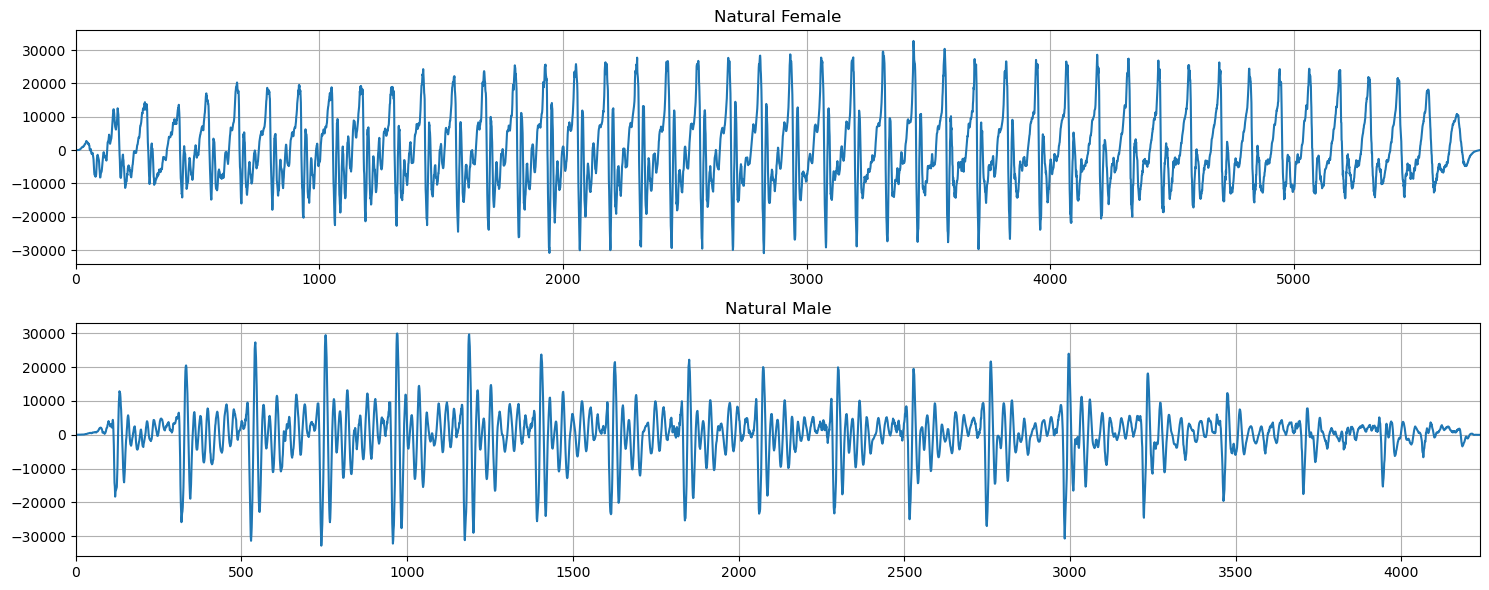

In [33]:
pl.figure(figsize=(15,6))  # Define the figure size

pl.subplot(2,1,1)          # First subplot of a 2 row, 1 columns subplots
pl.plot(X_1)               # We plot the data
pl.xlim(0, len(X_1))       # Define the min and max values of the x axis
pl.title('Natural Female') # Set the title
pl.grid()                  # Draw the background grid

pl.subplot(2,1,2)          # Second subplot of a 2 row, 1 columns subplots
pl.plot(X_2)               # We plot the data
pl.xlim(0, len(X_2))       # Define the min and max values of the x axis
pl.title('Natural Male')   # Set the title
pl.grid()                  # Draw the background grid

pl.tight_layout()

In [34]:
from python_speech_features import mfcc


# (1) Here we compute the MFCC of the previously open recordings
ceps_1 = mfcc(X_1, samplerate=sample_rate_1, nfft=1024)
ceps_2 = mfcc(X_2, samplerate=sample_rate_2, nfft=1024)

In [35]:
# The results is a numpy array of MFCC of the shape (nb of windows, 13)
# (remember that 13 is the nb of MFCC coefficients)
ceps_1.shape

(23, 13)

In [36]:
# Note that audio recordings do not all have the same number of 
# windows as you can see below
ceps_2.shape

(17, 13)

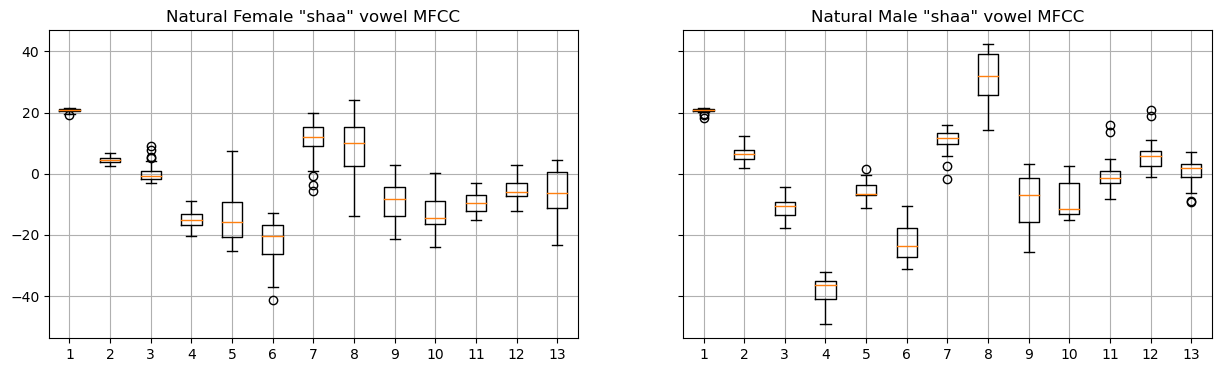

In [37]:
f, (ax1, ax2) = pl.subplots(1,2, sharey='all', figsize=(15,4))
ax1.plot()
ax1.boxplot(ceps_1)
ax1.set_title('Natural Female "shaa" vowel MFCC')
ax1.grid()
ax2.boxplot(ceps_2)
ax2.set_title('Natural Male "shaa" vowel MFCC')
ax2.grid()

### Boxplot of all median MFCC of men and women recordings 

In [38]:
# Here we read the wave files and store their content in lists
naf_audios = [wav.read(path) for path in naf_paths]
nam_audios = [wav.read(path) for path in nam_paths]

**TODO:**
For each recordings, take the median mfcc across windows so that for each one of the 13 MFCC only one value remains per recordings.

In [39]:
# HINT: you can see how to compute the MFCC
# at the point (1) above.
# You can compute the median with numpy.
# Remember that it's possible to specify along wich axis you want to compute
# the median: https://numpy.org/doc/stable/reference/generated/numpy.median.html
naf_mfcc_median = np.array([np.median(mfcc(data, samplerate=sample_rate, nfft=1024), axis=0) for sample_rate, data in naf_audios])
nam_mfcc_median = np.array([np.median(mfcc(data, samplerate=sample_rate, nfft=1024), axis=0) for sample_rate, data in nam_audios])

In [40]:
naf_mfcc_median.shape

(36, 13)

In [41]:
nam_mfcc_median.shape

(36, 13)

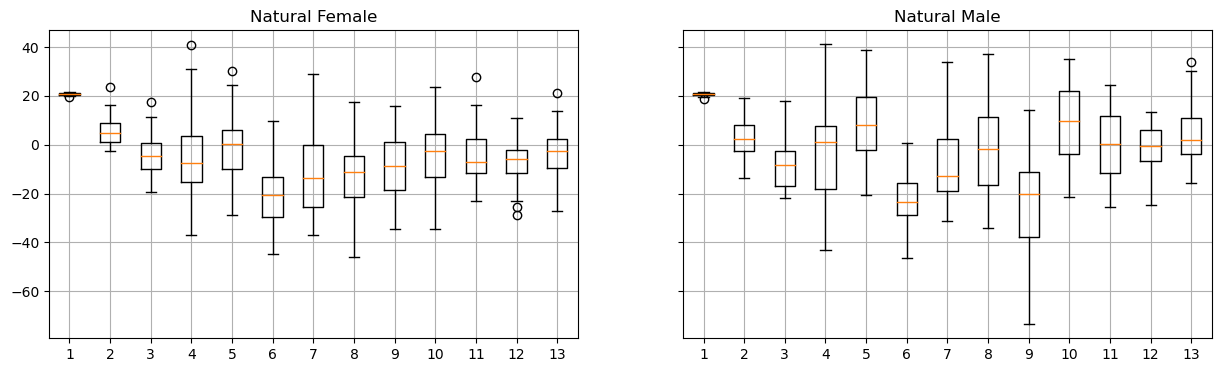

In [42]:
f, (ax1, ax2) = pl.subplots(1,2, sharey='all', figsize=(15,4))
ax1.plot()
ax1.boxplot(naf_mfcc_median)
ax1.set_title('Natural Female')
ax1.grid()
ax2.boxplot(nam_mfcc_median)
ax2.set_title('Natural Male')
ax2.grid()

### Identify pairs of MFCC features that are useful to differentiate men from women and create scatter plots with them

In [43]:
# Ex: create an array with first the 5th MFCC of each natural male recordings
# and then concatenate it with an array containing
# the 5th MFCC of each natural female recording
mfcc_5  = np.concatenate((nam_mfcc_median[:,4], naf_mfcc_median[:,4]))

# Create an array of the true class of each points
# The classes number (0, 1) is expected to be in the
# same order as the MFCCs
classes = np.concatenate((
    np.repeat(0, len(nam_mfcc_median)), # Class 'natural male' is 0
    np.repeat(1, len(naf_mfcc_median))  # Class 'natural female' is 1
))

**TODO**: create three scatter plots of different interesting MFCC pairs

**See**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

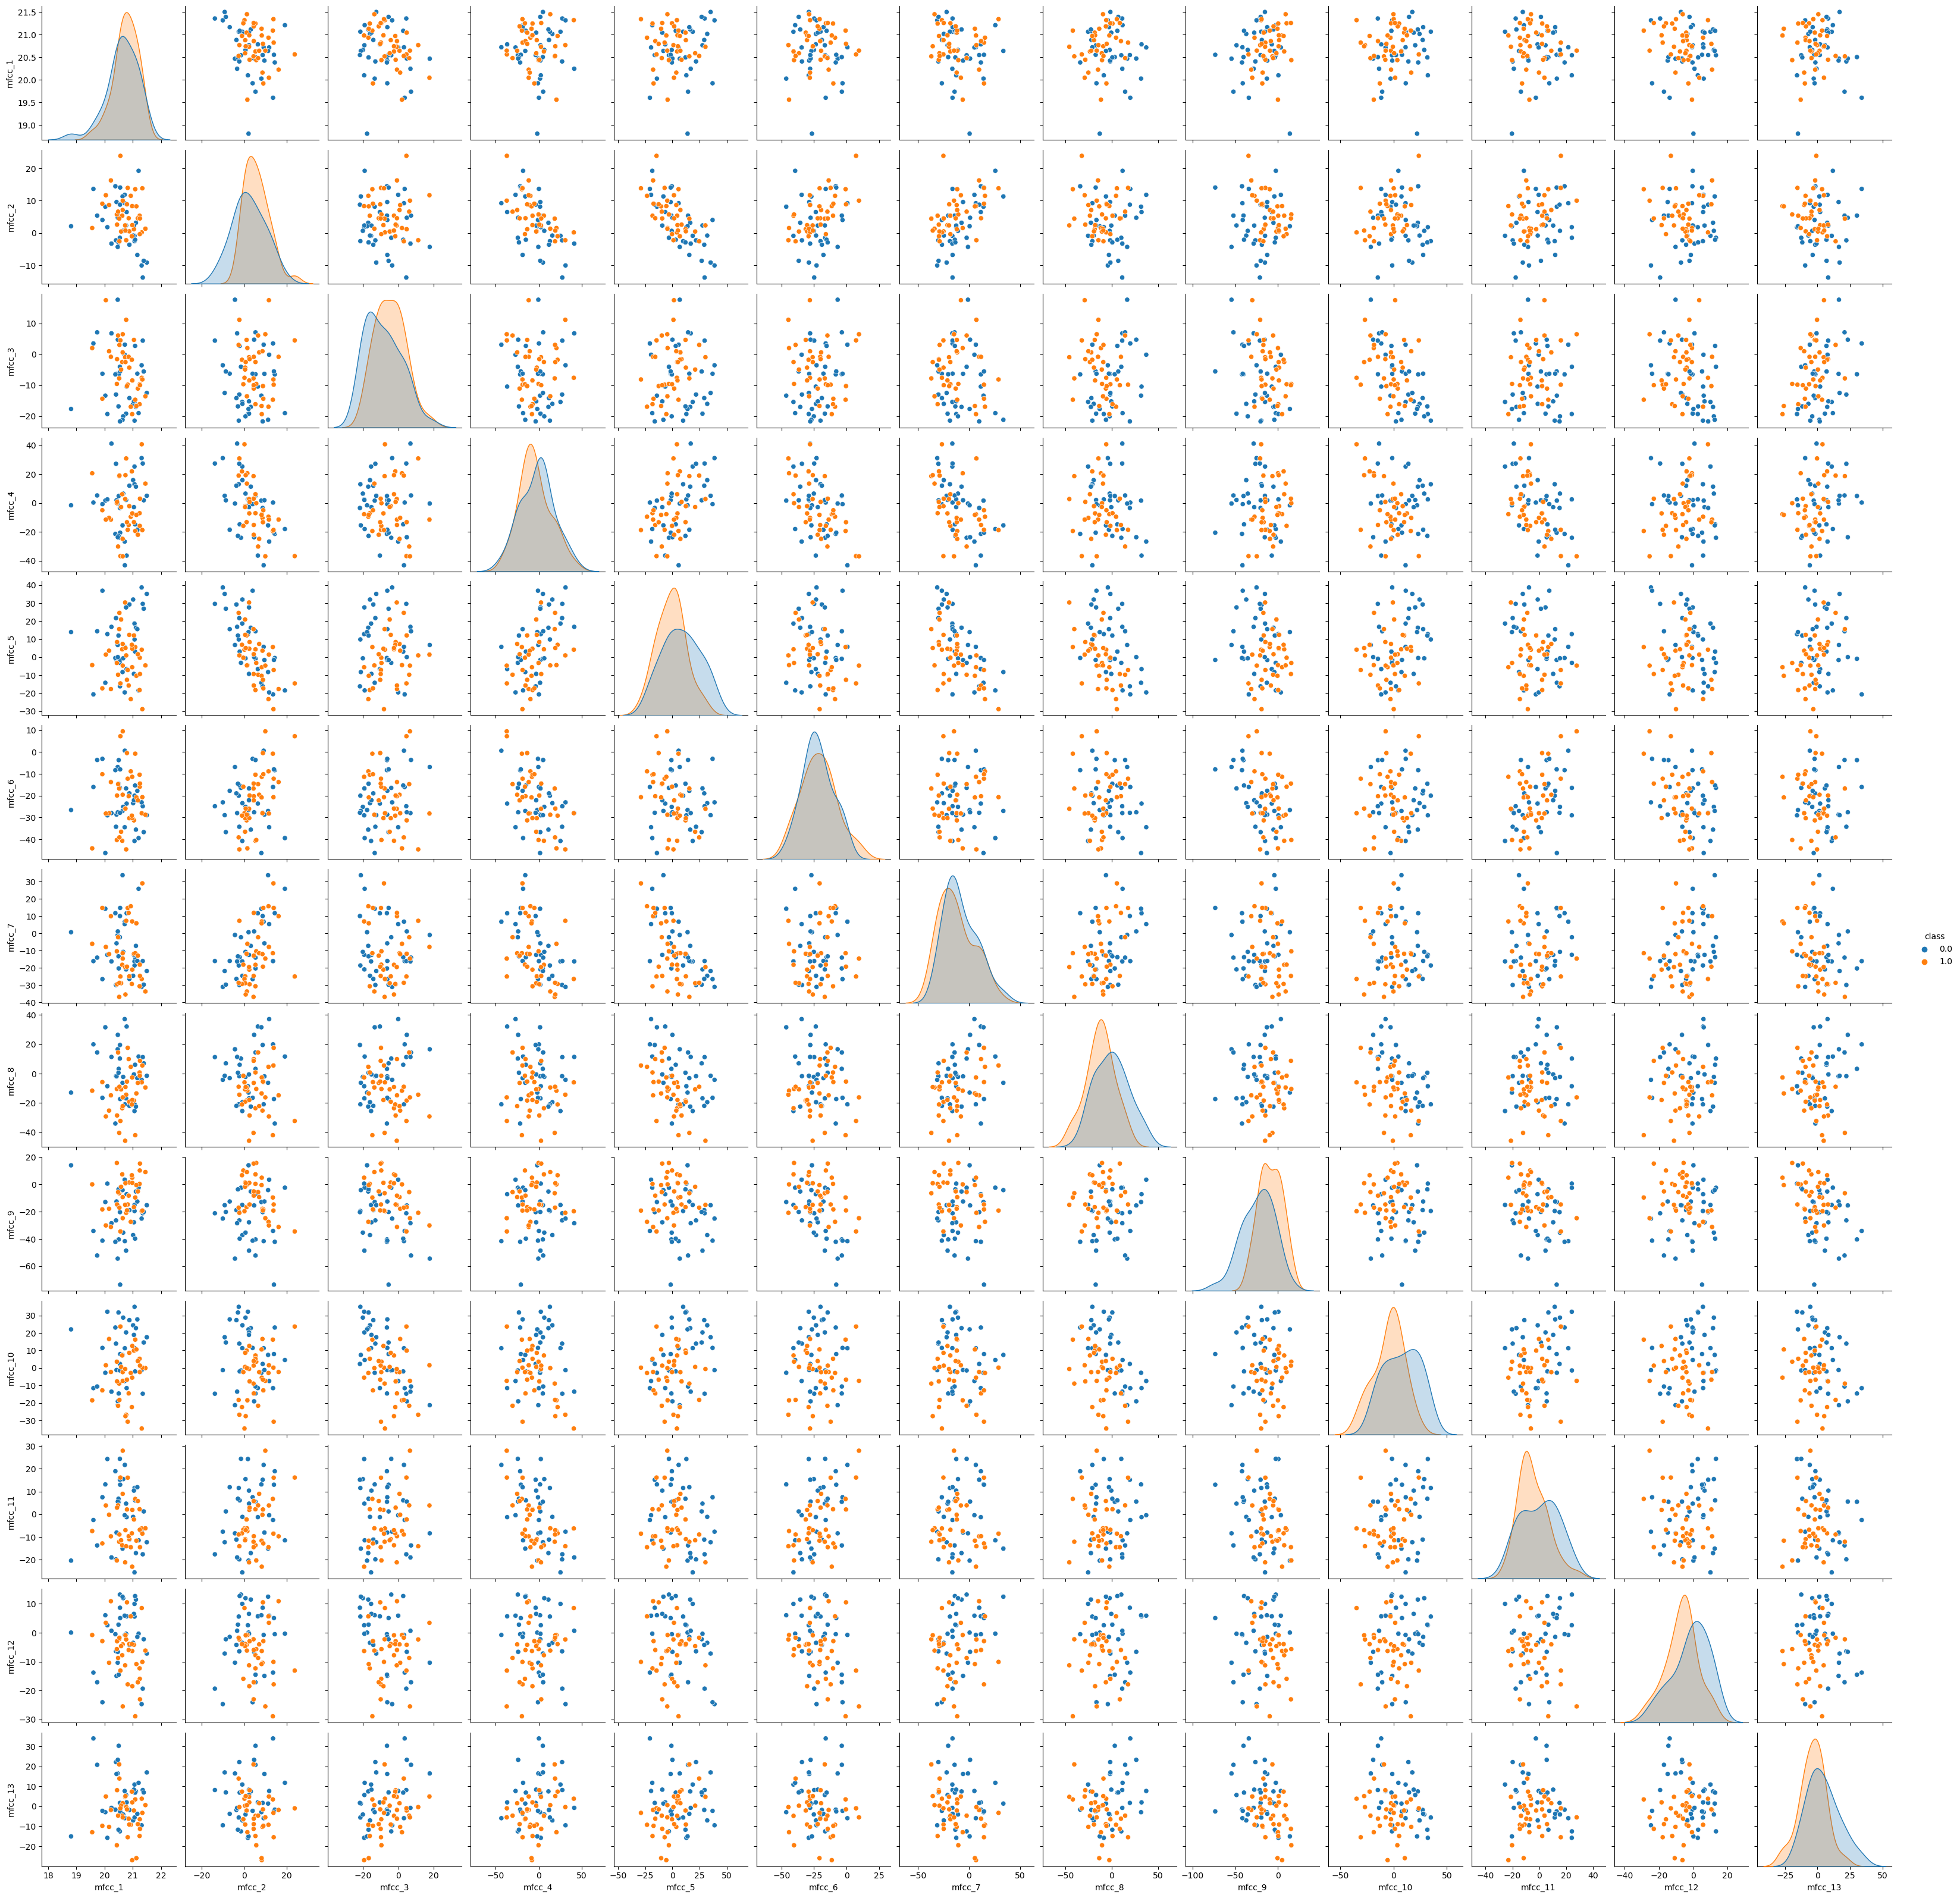

In [73]:
columns = ['mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'class']
df = pd.DataFrame(np.concatenate((
    np.concatenate((nam_mfcc_median, np.full((len(nam_mfcc_median), 1), 0)), axis=1),
    np.concatenate((naf_mfcc_median, np.full((len(naf_mfcc_median), 1), 1)), axis=1)
)), columns=columns)

# Create a pairplot to compare all 13 MFCCs with the class
_ = sns.pairplot(data = df, hue='class')

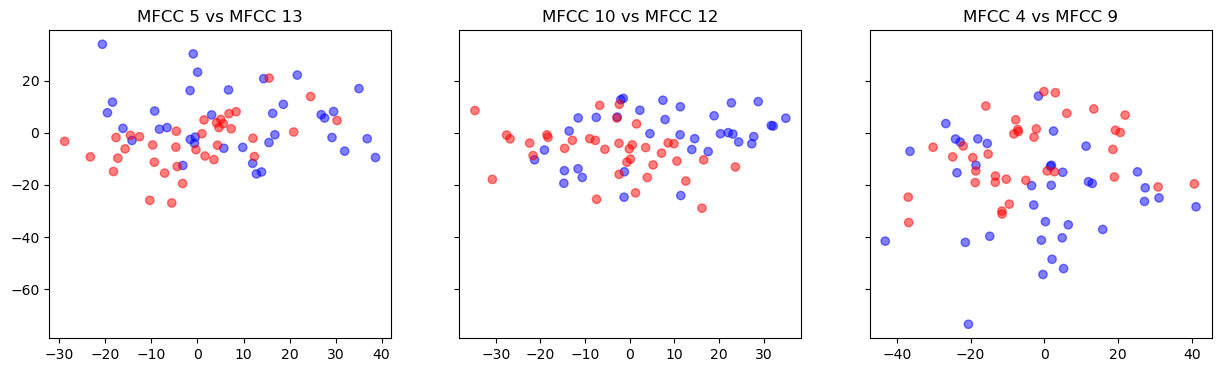

In [84]:
pairs = [(5, 13), (10, 12), (4, 9)]
_, axs = pl.subplots(1, len(pairs), sharey='all', figsize=(15,4))

for i, (x, y) in enumerate(pairs):
    axs[i].scatter(df[f'mfcc_{x}'], df[f'mfcc_{y}'], c=df['class'], cmap='bwr', alpha=0.5)
    axs[i].set_title(f'MFCC {x} vs MFCC {y}')

### Create rules to differentiate women from men vowels recordings and compute the accuracy

In [85]:
# See: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
def plot_confusion_matrix(conf_matrix, classes_names = ['natural male', 'natural female']):
    fig, ax = pl.subplots()
    im = ax.imshow(conf_matrix, cmap="viridis")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(classes_names)))
    ax.set_xticklabels(classes_names)
    ax.set_yticks(np.arange(len(classes_names)), labels=classes_names)
    ax.set_yticklabels(classes_names)

    # Rotate the tick labels and set their alignment.
    pl.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(classes_names)):
        for j in range(len(classes_names)):
            text = ax.text(j, i, conf_matrix[i, j], fontweight="bold", fontsize="large", ha="center", va="center", c="r")

    fig.tight_layout()
    pl.show()

## Classify recordings With KNN

Instead of doing it manually, you will now implement a ML algorithm that will learn how to classify the recordings by itself. In order to do that, you first need to create the dataset containing the features used to make predictions (mfccs) as well as the labels we are trying to predict (classes).

In [86]:
mfccs = np.concatenate((
    nam_mfcc_median[:,[4,12]],
    naf_mfcc_median[:,[4,12]]
))

classes = np.concatenate((
    np.repeat(0, len(nam_mfcc_median)),
    np.repeat(1, len(naf_mfcc_median))
))

#### Shuffle data

In [87]:
random_order = np.random.permutation(mfccs.shape[0])
random_order

array([ 9, 62, 59,  0, 32, 43, 10, 17, 19, 26, 42, 16, 35, 68, 61, 30, 34,
       66, 27,  5, 67, 60, 37,  1, 55, 13, 25, 64,  8, 41, 46, 50, 28, 63,
       54, 58, 48, 70, 71, 38,  4, 18, 40, 69, 15, 65, 45, 11, 24, 57,  6,
       51, 39, 36, 47, 49, 23, 44, 53, 12, 56, 21, 22,  3, 52,  2, 14, 20,
       33, 29, 31,  7])

In [88]:
# We change the order of the two numpy arrays by selecting elements in the random order previously created.
mfccs = mfccs[random_order] 
classes = classes[random_order]

#### K-Fold Cross Validation

**Note**:
- K-Fold Cross Validation is explained at the page 10 of the ISD course document `7.ISD_PerformanceEvaluation.pdf`
- KNN is explained at the page 12 of the ISD course document `6.ISD_ApprentissageSupervise.pdf`

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

sum_confusion_matrix = np.zeros((2,2), dtype="int32")

# See: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
for train_index, val_index in KFold(n_splits=5).split(mfccs):
    # Here we will have indexes of train and validation respectively.
    # Same principle as the random order: we can give a numpy array
    # containing a list of indexes to select all the elements at those indexes.
    train_data, val_data = mfccs[train_index], mfccs[val_index]
    train_class, val_class = classes[train_index], classes[val_index]
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_data, train_class)
    preds = knn.predict(val_data)
    
    # We sum the confusion matrix of each validation
    # to have a confusion matrix summarizing the cross validation
    # results.
    sum_confusion_matrix += confusion_matrix(val_class, preds)

#### Plot confusion matrix

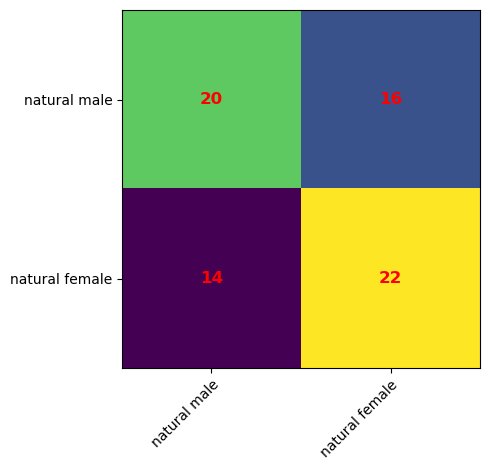

In [92]:
plot_confusion_matrix(sum_confusion_matrix)

## Now use all mfcc features and KNN to classify them
Do the same as previously but instead of using only a pair of MFCC to classify recordings, use all the MFCCs.

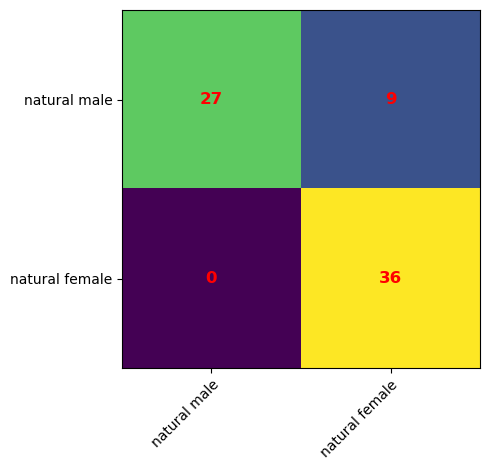

In [115]:
cmfccs = np.concatenate((
    nam_mfcc_median,
    naf_mfcc_median
))

cclasses = np.concatenate((
    np.repeat(0, len(nam_mfcc_median)),
    np.repeat(1, len(naf_mfcc_median))
))

random_order = np.random.permutation(cmfccs.shape[0])
cmfccs = cmfccs[random_order]
cclasses = cclasses[random_order]

sum_confusion_matrix = np.zeros((2,2), dtype="int32")
for train_index, val_index in KFold(n_splits=5).split(cmfccs):
    train_data, val_data = cmfccs[train_index], cmfccs[val_index]
    train_class, val_class = cclasses[train_index], cclasses[val_index]
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_data, train_class)
    preds = knn.predict(val_data)
    
    sum_confusion_matrix += confusion_matrix(val_class, preds)

plot_confusion_matrix(sum_confusion_matrix)